# Lab task (2b)

In [ ]:

from collections import Counter
def print_text_with_spaces(text, words_per_line):
    words = text.split()
    for i in range(0, len(words), words_per_line):
        print(" ".join(words[i:i+words_per_line]))


def decrypt(text, mapping):
    decrypted_text = ""
    for char in text:
        if char.isalpha():
            if char in mapping:
                decrypted_text += mapping[char]
            else:
                decrypted_text += "*"
        else:
            decrypted_text += char  # Preserve punctuation
    return decrypted_text

def analyze_frequency(ciphertext):
    # Remove spaces and punctuation
    ciphertext = ''.join(char for char in ciphertext if char.isalpha())
    # Count the frequency of each letter
    frequency = Counter(ciphertext)
    # Sort the letters by frequency
    sorted_frequency = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
    return sorted_frequency

def algo(text, mapping, words_per_line):
    while True:
        print("Current mapping:")
        print(mapping)
        reverse_mapping = {}
        found_duplicate = False 
        for key, value in mapping.items():
          if value in reverse_mapping:
            print(f"{reverse_mapping[value]} maps to the same value as {key}: {value}")
            found_duplicate = True
            break
          else:
            reverse_mapping[value] = key 
        if found_duplicate:
          break          
        frequency_list = analyze_frequency(text)
        decrypted_text = decrypt(text, mapping)
        print("Decrypted text:")
        print_text_with_spaces(decrypted_text, words_per_line)
        
        print("Frequency list:")
        for char, freq in frequency_list:
            print(f"{char}: {freq}")
        
        replacement = input("Enter replacement (or 'q' to quit): ")
        if replacement.lower() == 'q':
            break
        if len(replacement) != 2 or replacement[0] not in 'abcdefghijklmnopqrstuvwxyz' or replacement[1] not in 'abcdefghijklmnopqrstuvwxyz':
            print("Invalid input. Please enter a valid replacement.")
            continue
        if replacement[0] in mapping.values() or replacement[1] in mapping.values():
            print("Error: One of the replacement characters is already mapped to another character.")
            continue
        mapping[replacement[0]] = replacement[1]

        # Check if any character is mapped to the same replacement
        duplicate_mapping = [char for char, mapped_char in mapping.items() if mapped_char == replacement[1] and char != replacement[0]]
        if duplicate_mapping:
            print(f"Error: Character '{duplicate_mapping[0]}' is already mapped to '{replacement[1]}'.")
            del mapping[replacement[0]]  # Rollback the mapping
            continue

text = "exupziu kxwqxagxom, upm gxsm zs l amtwzo exgg rmqzfm kigg \
lok xolquxjm. lgwz, l kxwqxagxomk amtwzo qlo qzoutzg lok plokgm \
upm wxuiluxzo zs gxjxoh xo l wzapxwuxqlumk elc uplo upzwm \
epz kz ozu. fztmzjmt, xs czi pljm l aglo lok \
czi elou uz xfagmfmou xu xo czit gxsm upmo czi \
ommk kxwqxagxom. xu flnmw upxohw mlwc szt czi uz plokgm \
lok iguxflumgc rtxoh wiqqmww uz czit gxsm. xs ulgn lrziu \
upm ucamw zs kxwqxagxom, upmo upmc ltm hmomtlggc zs uez \
ucamw. sxtwu zom xw xokiqmk kxwqxagxom lok upm wmqzok zom \
xw wmgs- kxwqxagxom. xokiqmk kxwqxagxom xw wzfmupxoh uplu zupmtw ulihpu \
iw zt em gmlto rc wmmxoh zupmtw. epxgm wmgs-kxwqxagxom qzfmw \
stzf exupxo lok em gmlto xu zo zit zeo wmgs. \
wmgs-kxwqxagxom tmyixtmw l gzu zs fzuxjluxzo lok wiaaztu stzf zupmtw. \
lrzjm lgg, szggzexoh czit klxgc wqpmkigm exupziu loc fxwulnm xw \
lgwz altu zs rmxoh kxwqxagxomk."

mapping = {'m':'a'}
words_per_line = 10
algo(text, mapping, words_per_line)

#### Frequency table 
| Character | Frequency | Character | Frequency | Character | Frequency | Character | Frequency |
|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| x         | 74        | m         | 73        | z         | 57        | o         | 55        |
| u         | 52        | w         | 47        | g         | 44        | l         | 43        |
| k         | 32        | p         | 26        | t         | 26        | i         | 22        |
| q         | 22        | a         | 20        | s         | 20        | c         | 17        |
| e         | 13        | f         | 12        | h         | 9         | r         | 6         |
| j         | 6         | n         | 3         | y         | 1         |           |           |



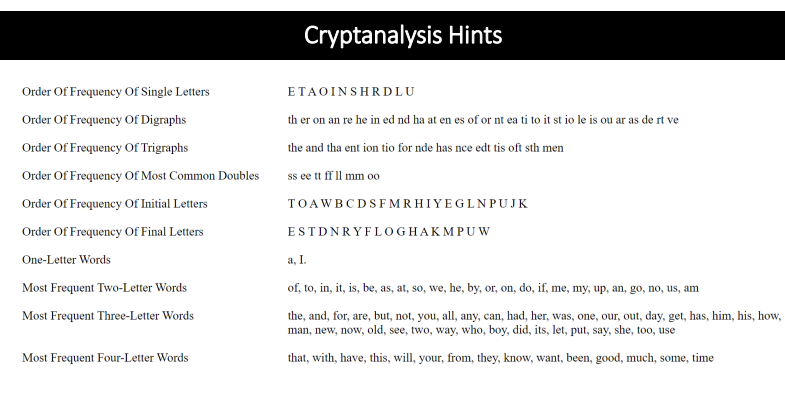

We will the above hints attached to the Lecture slide to solve the problem.

### Mapping
Here I am going to map the frequency table to the English alphabet. 

1. __Current mapping:__

{'l': 'a'}
<hr>

```

Decrypted text:
******* **********, *** **** ** a ****** **** ****** ****
a** **a*****. a***, a *********** ****** *a* ******* a** *a****
*** ****a**** ** ****** ** a *********a*** *a* **a* *****
*** ** ***. ********, ** *** *a** a **a* a**
*** *a** ** ********* ** ** **** **** **** ***
**** **********. ** *a*** ****** *a** *** *** ** *a****
a** *****a**** ***** ******* ** **** ****. ** *a** a****
*** ***** ** **********, **** **** a** *****a*** ** ***
*****. ***** *** ** ******* ********** a** *** ****** ***
** ****- **********. ******* ********** ** ********* **a* ****** *a****
** ** ** **a** ** ****** ******. ***** ****-********** *****
**** ****** a** ** **a** ** ** *** *** ****.
****-********** ******** a *** ** *****a**** a** ******* **** ******.
a**** a**, ********* **** *a*** ******** ******* a** ****a** **
a*** *a** ** ***** ***********.

```
__Reason for the mapping:__
- We know in English lagnunage the one letter word is 'a' and 'I' . But 'I' always comes at the start of the sentence. So, the one letter word is 'a' in this case.

2. __Current mapping:__

{'l': 'a', 'x': 'e'}
<hr>

```
Decrypted text:
*e***** *e**e**e**, *** *e** ** a ****** *e** ****** ****
a** e*a**e**. a***, a *e**e**e*** ****** *a* ******* a** *a****
*** *e**a*e** ** *e*e** e* a ****e**e*a*** *a* **a* *****
*** ** ***. ********, e* *** *a** a **a* a**
*** *a** ** e******** e* e* **** *e** **** ***
**** *e**e**e**. e* *a*** **e*** *a** *** *** ** *a****
a** ***e*a**** **e** ******* ** **** *e**. e* *a** a****
*** ***** ** *e**e**e**, **** **** a** *****a*** ** ***
*****. *e*** *** e* e****** *e**e**e** a** *** ****** ***
e* ****- *e**e**e**. e****** *e**e**e** e* ******e** **a* ****** *a****
** ** ** **a** ** ***e** ******. **e** ****-*e**e**e** *****
**** *e**e* a** ** **a** e* ** *** *** ****.
****-*e**e**e** ****e*** a *** ** ***e*a*e** a** ******* **** ******.
a**** a**, ******e** **** *ae** ******** *e***** a** *e**a** e*
a*** *a** ** **e** *e**e**e***.
```
__Reason for the mapping:__
- We know in English lagnunage the most frequent letter is 'e'. So, I have mapped 'x' to 'e'. But I map x to e there come two letters word starting with 'e' and this two words starting with not common. So, I have to change the mapping.

03. __Current mapping:__

{'l': 'a', 'x': 't'}
<hr>

```
Decrypted text:
*t***** *t**t**t**, *** *t** ** a ****** *t** ****** ****
a** t*a**t**. a***, a *t**t**t*** ****** *a* ******* a** *a****
*** *t**a*t** ** *t*t** t* a ****t**t*a*** *a* **a* *****
*** ** ***. ********, t* *** *a** a **a* a**
*** *a** ** t******** t* t* **** *t** **** ***
**** *t**t**t**. t* *a*** **t*** *a** *** *** ** *a****
a** ***t*a**** **t** ******* ** **** *t**. t* *a** a****
*** ***** ** *t**t**t**, **** **** a** *****a*** ** ***
*****. *t*** *** t* t****** *t**t**t** a** *** ****** ***
t* ****- *t**t**t**. t****** *t**t**t** t* ******t** **a* ****** *a****
** ** ** **a** ** ***t** ******. **t** ****-*t**t**t** *****
**** *t**t* a** ** **a** t* ** *** *** ****.
****-*t**t**t** ****t*** a *** ** ***t*a*t** a** ******* **** ******.
a**** a**, ******t** **** *at** ******** *t***** a** *t**a** t*
a*** *a** ** **t** *t**t**t***.
```
__Reason for the mapping:__
- We know in English lagnunage the second most frequent letter is 't'. So, I have mapped 'x' to 't'. This mapping is correct because the two letters word starting with 't' and this two words starting with common.

04. __Current mapping:__

{'l': 'a', 'x': 't', 'm': 'e'}
<hr>

```
Decrypted text:
*t***** *t**t**t*e, **e *t*e ** a *e**** *t** *e***e ****
a** t*a**t*e. a***, a *t**t**t*e* *e**** *a* ******* a** *a***e
**e *t**a*t** ** *t*t** t* a ****t**t*a*e* *a* **a* ****e
*** ** ***. ***e**e*, t* *** *a*e a **a* a**
*** *a** ** t***e*e** t* t* **** *t*e **e* ***
*ee* *t**t**t*e. t* *a*e* **t*** ea** *** *** ** *a***e
a** ***t*a*e** **t** ****e** ** **** *t*e. t* *a** a****
**e ***e* ** *t**t**t*e, **e* **e* a*e *e*e*a*** ** ***
***e*. *t*** **e t* t****e* *t**t**t*e a** **e *e**** **e
t* *e**- *t**t**t*e. t****e* *t**t**t*e t* ***e**t** **a* ***e** *a****
** ** *e *ea** ** *eet** ***e**. **t*e *e**-*t**t**t*e ***e*
**** *t**t* a** *e *ea** t* ** *** *** *e**.
*e**-*t**t**t*e *e**t*e* a *** ** ***t*a*t** a** ******* **** ***e**.
a***e a**, ******t** **** *at** ***e***e *t***** a** *t**a*e t*
a*** *a** ** *et** *t**t**t*e*.
```
__Reason for the mapping:__
- In the cipher text 'm' is the second most frequent letters. And 'e' is the most frequent letter to any text. As we don't map 'e' with the most frequent letter in the cipher text(the reason stated above), we can map 'm' to 'e'. This one of the probable mappings.

05. __Current mapping:__

{'l': 'a', 'x': 't', 'm': 'e', 'z': 'o'}
<hr>

```
Decrypted text:
*t**o** *t**t**t*e, **e *t*e o* a *e**o* *t** *e*o*e ****
a** t*a**t*e. a**o, a *t**t**t*e* *e**o* *a* *o***o* a** *a***e
**e *t**a*to* o* *t*t** t* a *o**t**t*a*e* *a* **a* **o*e
**o *o *o*. *o*eo*e*, t* *o* *a*e a **a* a**
*o* *a** *o t***e*e** t* t* *o** *t*e **e* *o*
*ee* *t**t**t*e. t* *a*e* **t*** ea** *o* *o* *o *a***e
a** ***t*a*e** **t** ****e** *o *o** *t*e. t* *a** a*o**
**e ***e* o* *t**t**t*e, **e* **e* a*e *e*e*a*** o* **o
***e*. *t*** o*e t* t****e* *t**t**t*e a** **e *e*o** o*e
t* *e**- *t**t**t*e. t****e* *t**t**t*e t* *o*e**t** **a* o**e** *a****
** o* *e *ea** ** *eet** o**e**. **t*e *e**-*t**t**t*e *o*e*
**o* *t**t* a** *e *ea** t* o* o** o** *e**.
*e**-*t**t**t*e *e**t*e* a *o* o* *o*t*a*to* a** ****o** **o* o**e**.
a*o*e a**, *o**o*t** *o** *at** ***e***e *t**o** a** *t**a*e t*
a**o *a** o* *et** *t**t**t*e*.
```
__Reason for the mapping:__
- As the 'z' is the third most frequent letter in the cipher text, I have mapped 'z' to 'o'. This is one of the probable mappings.

06. __Current mapping:__

{'l': 'a', 'x': 't', 'm': 'e', 'z': 'o', 'o': 'i'}
<hr>

```
Decrypted text:
*t**o** *t**t**tie, **e *t*e o* a *e**oi *t** *e*o*e ****
ai* tia**t*e. a**o, a *t**t**tie* *e**oi *ai *oi**o* ai* *ai**e
**e *t**a*toi o* *t*ti* ti a *o**t**t*a*e* *a* **ai **o*e
**o *o io*. *o*eo*e*, t* *o* *a*e a **ai ai*
*o* *ai* *o t***e*ei* t* ti *o** *t*e **ei *o*
iee* *t**t**tie. t* *a*e* **ti** ea** *o* *o* *o *ai**e
ai* ***t*a*e** **ti* ****e** *o *o** *t*e. t* *a** a*o**
**e ***e* o* *t**t**tie, **ei **e* a*e *eie*a*** o* **o
***e*. *t*** oie t* ti***e* *t**t**tie ai* **e *e*oi* oie
t* *e**- *t**t**tie. ti***e* *t**t**tie t* *o*e**ti* **a* o**e** *a****
** o* *e *ea*i ** *eeti* o**e**. **t*e *e**-*t**t**tie *o*e*
**o* *t**ti ai* *e *ea*i t* oi o** o*i *e**.
*e**-*t**t**tie *e**t*e* a *o* o* *o*t*a*toi ai* ****o** **o* o**e**.
a*o*e a**, *o**o*ti* *o** *at** ***e***e *t**o** ai* *t**a*e t*
a**o *a** o* *eti* *t**t**tie*.
```
__Reason for the mapping:__
- As the 'o' is the fourth most frequent letter in the cipher text, I have mapped 'o' to 'i'. But there is pitfall. A two letters word such as __oi__" has been formed, which is not a common word in English. So, I have to change the mapping.

07. __Current mapping:__
{'l': 'a', 'x': 't', 'm': 'e', 'z': 'o', 'o': 'n'}
<hr>

```
Decrypted text:
*t**o** *t**t**tne, **e *t*e o* a *e**on *t** *e*o*e ****
an* tna**t*e. a**o, a *t**t**tne* *e**on *an *on**o* an* *an**e
**e *t**a*ton o* *t*tn* tn a *o**t**t*a*e* *a* **an **o*e
**o *o no*. *o*eo*e*, t* *o* *a*e a **an an*
*o* *an* *o t***e*en* t* tn *o** *t*e **en *o*
nee* *t**t**tne. t* *a*e* **tn** ea** *o* *o* *o *an**e
an* ***t*a*e** **tn* ****e** *o *o** *t*e. t* *a** a*o**
**e ***e* o* *t**t**tne, **en **e* a*e *ene*a*** o* **o
***e*. *t*** one t* tn***e* *t**t**tne an* **e *e*on* one
t* *e**- *t**t**tne. tn***e* *t**t**tne t* *o*e**tn* **a* o**e** *a****
** o* *e *ea*n ** *eetn* o**e**. **t*e *e**-*t**t**tne *o*e*
**o* *t**tn an* *e *ea*n t* on o** o*n *e**.
*e**-*t**t**tne *e**t*e* a *o* o* *o*t*a*ton an* ****o** **o* o**e**.
a*o*e a**, *o**o*tn* *o** *at** ***e***e *t**o** an* *t**a*e t*
a**o *a** o* *etn* *t**t**tne*.
```
__Reason for the mapping:__
- There is another two word letter __tn__ which is not a common word in English. So, I have to change the x to t. Rather if I map x to i I may get a valid word __in__ at the end of the sentence. So, I have to map x to i. In the next cell I will map x to i.

07. __Current mapping:__
{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n'}
<hr>

```
Decrypted text:
*i**o** *i**i**ine, **e *i*e o* a *e**on *i** *e*o*e ****
an* ina**i*e. a**o, a *i**i**ine* *e**on *an *on**o* an* *an**e
**e *i**a*ion o* *i*in* in a *o**i**i*a*e* *a* **an **o*e
**o *o no*. *o*eo*e*, i* *o* *a*e a **an an*
*o* *an* *o i***e*en* i* in *o** *i*e **en *o*
nee* *i**i**ine. i* *a*e* **in** ea** *o* *o* *o *an**e
an* ***i*a*e** **in* ****e** *o *o** *i*e. i* *a** a*o**
**e ***e* o* *i**i**ine, **en **e* a*e *ene*a*** o* **o
***e*. *i*** one i* in***e* *i**i**ine an* **e *e*on* one
i* *e**- *i**i**ine. in***e* *i**i**ine i* *o*e**in* **a* o**e** *a****
** o* *e *ea*n ** *eein* o**e**. **i*e *e**-*i**i**ine *o*e*
**o* *i**in an* *e *ea*n i* on o** o*n *e**.
*e**-*i**i**ine *e**i*e* a *o* o* *o*i*a*ion an* ****o** **o* o**e**.
a*o*e a**, *o**o*in* *o** *ai** ***e***e *i**o** an* *i**a*e i*
a**o *a** o* *ein* *i**i**ine*.
```
__Reason for the mapping:__
- Now the current mapping seems to be correct. So, I will continue with the next letter.

08. __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f'}
<hr>

```
Decrypted text:
*i**o** *i**i**ine, **e *ife of a *e**on *i** *e*o*e ****
an* ina**i*e. a**o, a *i**i**ine* *e**on *an *on**o* an* *an**e
**e *i**a*ion of *i*in* in a *o**i**i*a*e* *a* **an **o*e
**o *o no*. *o*eo*e*, if *o* *a*e a **an an*
*o* *an* *o i***e*en* i* in *o** *ife **en *o*
nee* *i**i**ine. i* *a*e* **in** ea** fo* *o* *o *an**e
an* ***i*a*e** **in* ****e** *o *o** *ife. if *a** a*o**
**e ***e* of *i**i**ine, **en **e* a*e *ene*a*** of **o
***e*. fi*** one i* in***e* *i**i**ine an* **e *e*on* one
i* *e*f- *i**i**ine. in***e* *i**i**ine i* *o*e**in* **a* o**e** *a****
** o* *e *ea*n ** *eein* o**e**. **i*e *e*f-*i**i**ine *o*e*
f*o* *i**in an* *e *ea*n i* on o** o*n *e*f.
*e*f-*i**i**ine *e**i*e* a *o* of *o*i*a*ion an* ****o** f*o* o**e**.
a*o*e a**, fo**o*in* *o** *ai** ***e***e *i**o** an* *i**a*e i*
a**o *a** of *ein* *i**i**ine*.
```
__Reason for the mapping:__
- By mapping 's' to 'f' I have formed a valid word __of__. So, the mapping is correct.

09. __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l'}
<hr>

```
Decrypted text:
*i**o** *i**i*line, **e life of a *e**on *ill *e*o*e **ll
an* ina**i*e. al*o, a *i**i*line* *e**on *an *on**ol an* *an*le
**e *i**a*ion of li*in* in a *o**i**i*a*e* *a* **an **o*e
**o *o no*. *o*eo*e*, if *o* *a*e a *lan an*
*o* *an* *o i**le*en* i* in *o** life **en *o*
nee* *i**i*line. i* *a*e* **in** ea** fo* *o* *o *an*le
an* *l*i*a*el* **in* ****e** *o *o** life. if *al* a*o**
**e ***e* of *i**i*line, **en **e* a*e *ene*all* of **o
***e*. fi*** one i* in***e* *i**i*line an* **e *e*on* one
i* *elf- *i**i*line. in***e* *i**i*line i* *o*e**in* **a* o**e** *a****
** o* *e lea*n ** *eein* o**e**. **ile *elf-*i**i*line *o*e*
f*o* *i**in an* *e lea*n i* on o** o*n *elf.
*elf-*i**i*line *e**i*e* a lo* of *o*i*a*ion an* ****o** f*o* o**e**.
a*o*e all, follo*in* *o** *ail* ***e**le *i**o** an* *i**a*e i*
al*o *a** of *ein* *i**i*line*.
```
__Reason for the mapping:__
- By mapping 'g' to 'l' I have formed a valid word __life__. So, the mapping is seemed to be correct. So, I will continue with the next letter.



10. __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's'}
<hr>

```
Decrypted text:
*i**o** *is*i*line, **e life of a *e*son *ill *e*o*e **ll
an* ina**i*e. also, a *is*i*line* *e*son *an *on**ol an* *an*le
**e si**a*ion of li*in* in a so**is*i*a*e* *a* **an **ose
**o *o no*. *o*eo*e*, if *o* *a*e a *lan an*
*o* *an* *o i**le*en* i* in *o** life **en *o*
nee* *is*i*line. i* *a*es **in*s eas* fo* *o* *o *an*le
an* *l*i*a*el* **in* s***ess *o *o** life. if *al* a*o**
**e ***es of *is*i*line, **en **e* a*e *ene*all* of **o
***es. fi*s* one is in***e* *is*i*line an* **e se*on* one
is self- *is*i*line. in***e* *is*i*line is so*e**in* **a* o**e*s *a****
*s o* *e lea*n ** seein* o**e*s. **ile self-*is*i*line *o*es
f*o* *i**in an* *e lea*n i* on o** o*n self.
self-*is*i*line *e**i*es a lo* of *o*i*a*ion an* s***o** f*o* o**e*s.
a*o*e all, follo*in* *o** *ail* s**e**le *i**o** an* *is*a*e is
also *a** of *ein* *is*i*line*.
```
__Reason for the mapping:__
- By mapping 'w' to 's' I have formed a valid word __also__. So, the mapping is seemed to be correct. So, I will continue with the next letter.

11. __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r'}
<hr>

```
Decrypted text:
*i**o** *is*ipline, **e life of a person *ill *e*o*e **ll
an* ina**i*e. also, a *is*ipline* person *an *on*rol an* *an*le
**e si**a*ion of li*in* in a sop*is*i*a*e* *a* **an **ose
**o *o no*. *oreo*er, if *o* *a*e a plan an*
*o* *an* *o i*ple*en* i* in *o*r life **en *o*
nee* *is*ipline. i* *a*es **in*s eas* for *o* *o *an*le
an* *l*i*a*el* *rin* s***ess *o *o*r life. if *al* a*o**
**e **pes of *is*ipline, **en **e* are *enerall* of **o
**pes. firs* one is in***e* *is*ipline an* **e se*on* one
is self- *is*ipline. in***e* *is*ipline is so*e**in* **a* o**ers *a****
*s or *e learn ** seein* o**ers. **ile self-*is*ipline *o*es
fro* *i**in an* *e learn i* on o*r o*n self.
self-*is*ipline re**ires a lo* of *o*i*a*ion an* s*ppor* fro* o**ers.
a*o*e all, follo*in* *o*r *ail* s**e**le *i**o** an* *is*a*e is
also par* of *ein* *is*ipline*.
```
__Reason for the mapping:__
- I have assumed that the word __*e*son__ is __person__. So, I have mapped 'a' to 'p' and 't' to 'r'. Let's see if the mapping is correct.

12 __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r', 'k': 'd', 'q': 'c'}
<hr>

```
Decrypted text:
*i**o** discipline, **e life of a person *ill *eco*e d*ll
and inac*i*e. also, a disciplined person can con*rol and *andle
**e si**a*ion of li*in* in a sop*is*ica*ed *a* **an **ose
**o do no*. *oreo*er, if *o* *a*e a plan and
*o* *an* *o i*ple*en* i* in *o*r life **en *o*
need discipline. i* *a*es **in*s eas* for *o* *o *andle
and *l*i*a*el* *rin* s*ccess *o *o*r life. if *al* a*o**
**e **pes of discipline, **en **e* are *enerall* of **o
**pes. firs* one is ind*ced discipline and **e second one
is self- discipline. ind*ced discipline is so*e**in* **a* o**ers *a****
*s or *e learn ** seein* o**ers. **ile self-discipline co*es
fro* *i**in and *e learn i* on o*r o*n self.
self-discipline re**ires a lo* of *o*i*a*ion and s*ppor* fro* o**ers.
a*o*e all, follo*in* *o*r dail* sc*ed*le *i**o** an* *is*a*e is
also par* of *ein* disciplined.
```
__Reason for the mapping:__
- By mapping 'k' to 'd' and 'q' to 'c' I have formed a valid word __discipline__. So, the mapping is seemed to be correct. So, I will continue with the next letter.




13. __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r', 'k': 'd', 'q': 'c', 'e': 'w'}
<hr>

```
Decrypted text:
wi**o** discipline, **e life of a person will *eco*e d*ll
and inac*i*e. also, a disciplined person can con*rol and *andle
**e si**a*ion of li*in* in a sop*is*ica*ed wa* **an **ose
w*o do no*. *oreo*er, if *o* *a*e a plan and
*o* wan* *o i*ple*en* i* in *o*r life **en *o*
need discipline. i* *a*es **in*s eas* for *o* *o *andle
and *l*i*a*el* *rin* s*ccess *o *o*r life. if *al* a*o**
**e **pes of discipline, **en **e* are *enerall* of *wo
**pes. firs* one is ind*ced discipline and **e second one
is self- discipline. ind*ced discipline is so*e**in* **a* o**ers *a****
*s or we learn ** seein* o**ers. w*ile self-discipline co*es
fro* wi**in and we learn i* on o*r own self.
self-discipline re**ires a lo* of *o*i*a*ion and s*ppor* fro* o**ers.
a*o*e all, followin* *o*r dail* sc*ed*le wi**o** an* *is*a*e is
also par* of *ein* disciplined.
```
__Reason for the mapping:__
- By mapping 'e' to 'w' I have formed a valid word __will__. So, the mapping is seemed to be correct. So, I will continue with the next letter.


14. __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r', 'k': 'd', 'q': 'c', 'e': 'w', 'r': 'b', 'f': 'm'}
<hr>

```
Decrypted text:
wi**o** discipline, **e life of a person will become d*ll
and inac*i*e. also, a disciplined person can con*rol and *andle
**e si**a*ion of li*in* in a sop*is*ica*ed wa* **an **ose
w*o do no*. moreo*er, if *o* *a*e a plan and
*o* wan* *o implemen* i* in *o*r life **en *o*
need discipline. i* ma*es **in*s eas* for *o* *o *andle
and *l*ima*el* brin* s*ccess *o *o*r life. if *al* abo**
**e **pes of discipline, **en **e* are *enerall* of *wo
**pes. firs* one is ind*ced discipline and **e second one
is self- discipline. ind*ced discipline is some**in* **a* o**ers *a****
*s or we learn b* seein* o**ers. w*ile self-discipline comes
from wi**in and we learn i* on o*r own self.
self-discipline re**ires a lo* of mo*i*a*ion and s*ppor* from o**ers.
abo*e all, followin* *o*r dail* sc*ed*le wi**o** an* mis*a*e is
also par* of bein* disciplined.
```
__Reason for the mapping:__
- By mapping 'r' to 'b' and 'f' to 'm' I have formed a valid word __become__. So, the mapping is seemed to be correct. So, I will continue with the next letter.

15. __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r', 'k': 'd', 'q': 'c', 'e': 'w', 'r': 'b', 'f': 'm', 'p': 'h'}
<hr>

```
Decrypted text:
wi*ho** discipline, *he life of a person will become d*ll
and inac*i*e. also, a disciplined person can con*rol and handle
*he si**a*ion of li*in* in a sophis*ica*ed wa* *han *hose
who do no*. moreo*er, if *o* ha*e a plan and
*o* wan* *o implemen* i* in *o*r life *hen *o*
need discipline. i* ma*es *hin*s eas* for *o* *o handle
and *l*ima*el* brin* s*ccess *o *o*r life. if *al* abo**
*he **pes of discipline, *hen *he* are *enerall* of *wo
**pes. firs* one is ind*ced discipline and *he second one
is self- discipline. ind*ced discipline is some*hin* *ha* o*hers *a**h*
*s or we learn b* seein* o*hers. while self-discipline comes
from wi*hin and we learn i* on o*r own self.
self-discipline re**ires a lo* of mo*i*a*ion and s*ppor* from o*hers.
abo*e all, followin* *o*r dail* sched*le wi*ho** an* mis*a*e is
also par* of bein* disciplined.
```
__Reason for the mapping:__
- By mapping 'p' to 'h' I have formed a valid word __the__. 
- By mapping 'g' to 'l' I have formed a valid word __handle__.


16. __Current mapping:__
{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r', 'k': 'd', 'q': 'c', 'e': 'w', 'r': 'b', 'f': 'm', 'p': 'h', 'u': 't'}
<hr>

```
Decrypted text:
witho*t discipline, the life of a person will become d*ll
and inacti*e. also, a disciplined person can control and handle
the sit*ation of li*in* in a sophisticated wa* than those
who do not. moreo*er, if *o* ha*e a plan and
*o* want to implement it in *o*r life then *o*
need discipline. it ma*es thin*s eas* for *o* to handle
and *ltimatel* brin* s*ccess to *o*r life. if tal* abo*t
the t*pes of discipline, then the* are *enerall* of two
t*pes. first one is ind*ced discipline and the second one
is self- discipline. ind*ced discipline is somethin* that others ta**ht
*s or we learn b* seein* others. while self-discipline comes
from within and we learn it on o*r own self.
self-discipline re**ires a lot of moti*ation and s*pport from others.
abo*e all, followin* *o*r dail* sched*le witho*t an* mista*e is
also part of bein* disciplined.
```
__Reason for the mapping:__
- After this mapping to u to t, I am sure that I am in the right way. Now, I can move till the end of the text.


17.__Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r', 'k': 'd', 'q': 'c', 'e': 'w', 'r': 'b', 'f': 'm', 'p': 'h', 'u': 't', 'i': 'u'}

<hr>

```
Decrypted text:
without discipline, the life of a person will become dull
and inacti*e. also, a disciplined person can control and handle
the situation of li*in* in a sophisticated wa* than those
who do not. moreo*er, if *ou ha*e a plan and
*ou want to implement it in *our life then *ou
need discipline. it ma*es thin*s eas* for *ou to handle
and ultimatel* brin* success to *our life. if tal* about
the t*pes of discipline, then the* are *enerall* of two
t*pes. first one is induced discipline and the second one
is self- discipline. induced discipline is somethin* that others tau*ht
us or we learn b* seein* others. while self-discipline comes
from within and we learn it on our own self.
self-discipline re*uires a lot of moti*ation and support from others.
abo*e all, followin* *our dail* schedule without an* mista*e is
also part of bein* disciplined.
```

__Reason for the mapping:__
- By mapping 'i' to 'u' I have formed a valid word __our__.


18 __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r', 'k': 'd', 'q': 'c', 'e': 'w', 'r': 'b', 'f': 'm', 'p': 'h', 'u': 't', 'i': 'u', 'h': 'g'}
<hr>

```

Decrypted text:
without discipline, the life of a person will become dull
and inacti*e. also, a disciplined person can control and handle
the situation of li*ing in a sophisticated wa* than those
who do not. moreo*er, if *ou ha*e a plan and
*ou want to implement it in *our life then *ou
need discipline. it ma*es things eas* for *ou to handle
and ultimatel* bring success to *our life. if tal* about
the t*pes of discipline, then the* are generall* of two
t*pes. first one is induced discipline and the second one
is self- discipline. induced discipline is something that others taught
us or we learn b* seeing others. while self-discipline comes
from within and we learn it on our own self.
self-discipline re*uires a lot of moti*ation and support from others.
abo*e all, following *our dail* schedule without an* mista*e is
also part of being disciplined.

```
__Reason for the mapping:__
- Here I have mapped 'h' to 'g' and have got more valid words like __following__, __bring__, __something__ and so on.

20. __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r', 'k': 'd', 'q': 'c', 'e': 'w', 'r': 'b', 'f': 'm', 'p': 'h', 'u': 't', 'i': 'u', 'h': 'g', 'c': 'y'}
<hr>

```
Decrypted text:
without discipline, the life of a person will become dull
and inacti*e. also, a disciplined person can control and handle
the situation of li*ing in a sophisticated way than those
who do not. moreo*er, if you ha*e a plan and
you want to implement it in your life then you
need discipline. it ma*es things easy for you to handle
and ultimately bring success to your life. if tal* about
the types of discipline, then they are generally of two
types. first one is induced discipline and the second one
is self- discipline. induced discipline is something that others taught
us or we learn by seeing others. while self-discipline comes
from within and we learn it on our own self.
self-discipline re*uires a lot of moti*ation and support from others.
abo*e all, following your daily schedule without any mista*e is
also part of being disciplined.
```
__Reason for the mapping:__
- After mapping 'c' to 'y' I have formed a valid word __way__, __easy__, __daily__ and so on. So, the mapping is correct.

21 __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r', 'k': 'd', 'q': 'c', 'e': 'w', 'r': 'b', 'f': 'm', 'p': 'h', 'u': 't', 'i': 'u', 'h': 'g', 'c': 'y', 'j': 'v'}
<hr>

```
Decrypted text:
without discipline, the life of a person will become dull
and inactive. also, a disciplined person can control and handle
the situation of living in a sophisticated way than those
who do not. moreover, if you have a plan and
you want to implement it in your life then you
need discipline. it ma*es things easy for you to handle
and ultimately bring success to your life. if tal* about
the types of discipline, then they are generally of two
types. first one is induced discipline and the second one
is self- discipline. induced discipline is something that others taught
us or we learn by seeing others. while self-discipline comes
from within and we learn it on our own self.
self-discipline re*uires a lot of motivation and support from others.
above all, following your daily schedule without any mista*e is
also part of being disciplined.
```
__Reason for the mapping:__
- By mapping 'j' to 'v' I have formed a valid word __living__, __moreover__, __motivation__ and so on. So, the mapping is correct.

22. __Current mapping:__

{'l': 'a', 'x': 'i', 'm': 'e', 'z': 'o', 'o': 'n', 's': 'f', 'g': 'l', 'w': 's', 'a': 'p', 't': 'r', 'k': 'd', 'q': 'c', 'e': 'w', 'r': 'b', 'f': 'm', 'p': 'h', 'u': 't', 'i': 'u', 'h': 'g', 'c': 'y', 'j': 'v', 'n': 'k', 'y': 'q'}
<hr>

```
Decrypted text:
without discipline, the life of a person will become dull
and inactive. also, a disciplined person can control and handle
the situation of living in a sophisticated way than those
who do not. moreover, if you have a plan and
you want to implement it in your life then you
need discipline. it makes things easy for you to handle
and ultimately bring success to your life. if talk about
the types of discipline, then they are generally of two
types. first one is induced discipline and the second one
is self- discipline. induced discipline is something that others taught
us or we learn by seeing others. while self-discipline comes
from within and we learn it on our own self.
self-discipline requires a lot of motivation and support from others.
above all, following your daily schedule without any mistake is
also part of being disciplined.
```
__Reason for the mapping:__
- By mapping 'n' to 'k' and 'y' to 'q' I have formed a valid decrypted text which gramartically and syntactically correct. So, the mapping is correct.

### Deciphered Text:
without discipline, the life of a person will become dull and inactive. Also, a
disciplined person can control and handle the situation of living in a sophisticated
way than those who do not.moreover, if you have a plan and you want to implement
it in your life then you need discipline. It makes things easy for you to handle and
ultimately bring success to your life. If talk about the types of discipline, then they
are generally of two types. First one is induced discipline and the second one is selfdiscipline. induced discipline is something that others taught us or we learn by
seeing others. While self-discipline comes from within and we learn it on our own
self. Self-discipline requires a lot of motivation and support from others. Above all,
following your daily schedule without any mistake is also part of being disciplined.

#### Final mapping table

| Encrypted | Decrypted | Encrypted | Decrypted | Encrypted | Decrypted | Encrypted | Decrypted |
|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| l         | a         | x         | i         | m         | e         | z         | o         |
| o         | n         | s         | f         | g         | l         | w         | s         |
| a         | p         | t         | r         | k         | d         | q         | c         |
| e         | w         | r         | b         | f         | m         | p         | h         |
| u         | t         | i         | u         | h         | g         | c         | y         |
